# Document Clustering


Clustering adalah salah satu Teknik Pembelajaran Mesin Tanpa Pengawasan yang paling penting. Algoritme ini sangat berguna, terutama dalam situasi di mana data berlabel merupakan barang mewah. Teknik pengelompokan membantu kita memahami pola yang mendasari data (lebih-lebih di sekitar mereka serupa) bersama dengan kemampuan untuk mem-bootstrap pendekatan pembelajaran terawasi tertentu juga.



Teknik pengelompokan telah dipelajari secara mendalam selama bertahun-tahun dan ada beberapa algoritma pengelompokan yang sangat kuat yang tersedia. Untuk tutorial ini, kita akan bekerja dengan kumpulan data film yang berisi plot film, pemeran, genre, dan informasi terkait lainnya. Kami akan bekerja dengan metode K-Means dan Ward-Hierarchical-Clustering.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('tmdb_5000_movies.csv.gz',
                 compression='gzip')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [3]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
df = df[['title', 'tagline', 'overview', 'genres', 'popularity']]
df.tagline.fillna('', inplace=True)
df['description'] = df['tagline'].map(str) + ' ' + df['overview']
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4802
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        4800 non-null   object 
 1   tagline      4800 non-null   object 
 2   overview     4800 non-null   object 
 3   genres       4800 non-null   object 
 4   popularity   4800 non-null   float64
 5   description  4800 non-null   object 
dtypes: float64(1), object(5)
memory usage: 262.5+ KB


<ipython-input-4-20e777f62d58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.tagline.fillna('', inplace=True)
<ipython-input-4-20e777f62d58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = df['tagline'].map(str) + ' ' + df['overview']
<ipython-input-4-20e777f62d58>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [5]:
df.head()

,title,tagline,overview,genres,popularity,description
0,Avatar,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,Enter the World of Pandora. In the 22nd centur...
1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.","Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,"At the end of the world, the adventure begins...."
2,Spectre,A Plan No One Escapes,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,A Plan No One Escapes A cryptic message from B...
3,The Dark Knight Rises,The Legend Ends,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,The Legend Ends Following the death of Distric...
4,John Carter,"Lost in our world, found in another.","John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,"Lost in our world, found in another. John Cart..."


## Giliran Anda: Kelompokkan Film Serupa

Di sini Anda akan mempelajari cara mengelompokkan dokumen teks (dalam hal ini film). Kami akan menggunakan pipa berikut:
- Teks pra-pemrosesan
- Rekayasa Fitur
- Pengelompokan Menggunakan K-Means
- Menemukan Nilai Optimal untuk K
- Siapkan Kelompok Film

Pengelompokan adalah pendekatan tanpa pengawasan untuk menemukan kelompok item serupa dalam kumpulan data apa pun. Ada berbagai algoritme pengelompokan dan __K-Means__ cukup sederhana namun berpengaruh. Sebagian besar film memiliki emosi yang berbeda dan dapat dikategorikan ke dalam beberapa genre (sama halnya dengan film yang tercantum dalam kumpulan data kami saat ini). Bisakah pengelompokan deskripsi film membantu kita memahami pengelompokan ini?

Analisis kesamaan (di bagian sebelumnya) adalah titik awal yang baik, tetapi dapatkah kita melakukannya dengan lebih baik?

## Text Preprocessing

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
import nltk
import re
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(list(df['description']))
len(norm_corpus)

4800

In [8]:
norm_corpus[4799]

'ever since second grade first saw et extraterrestrial brian herzlinger crush drew barrymore 20 years later hes decided try fulfill lifelong dream asking date theres one small problem shes drew barrymore hes well brian herzlinger broke 27yearold aspiring filmmaker new jersey'

## Extract TF-IDF

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

stop_words = stop_words + ['one', 'two', 'get']
cv = CountVectorizer(ngram_range=(1, 2), min_df=10, max_df=0.8, stop_words=stop_words)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix.shape

(4800, 3012)

In [10]:
cv

CountVectorizer(max_df=0.8, min_df=10, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

## Cluster Movies Menggunakan K-Means

In [11]:
from sklearn.cluster import KMeans

NUM_CLUSTERS = 6
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=50, random_state=42).fit(cv_matrix)
km

KMeans(max_iter=10000, n_clusters=6, n_init=50, random_state=42)

In [12]:
from collections import Counter

Counter(km.labels_)

Counter({2: 429, 1: 2832, 3: 539, 5: 238, 4: 706, 0: 56})

In [13]:
df['kmeans_cluster'] = km.labels_

In [14]:
df

,title,tagline,overview,genres,popularity,description,kmeans_cluster
0,Avatar,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,Enter the World of Pandora. In the 22nd centur...,2
1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.","Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,"At the end of the world, the adventure begins....",2
2,Spectre,A Plan No One Escapes,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,A Plan No One Escapes A cryptic message from B...,1
3,The Dark Knight Rises,The Legend Ends,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,The Legend Ends Following the death of Distric...,3
4,John Carter,"Lost in our world, found in another.","John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,"Lost in our world, found in another. John Cart...",2
...,...,...,...,...,...,...,...
4798,El Mariachi,"He didn't come looking for trouble, but troubl...",El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",14.269792,"He didn't come looking for trouble, but troubl...",1
4799,Newlyweds,A newlywed couple's honeymoon is upended by th...,A newlywed couple's honeymoon is upended by th...,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",0.642552,A newlywed couple's honeymoon is upended by th...,1
4800,"Signed, Sealed, Delivered",,"""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",1.444476,"""Signed, Sealed, Delivered"" introduces a dedi...",2
4801,Shanghai Calling,A New Yorker in Shanghai,When ambitious New York attorney Sam is sent t...,[],0.857008,A New Yorker in Shanghai When ambitious New Yo...,3


In [15]:
movie_clusters = (df[['title', 'kmeans_cluster', 'popularity']]
                  .sort_values(by=['kmeans_cluster', 'popularity'],
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))
movie_clusters = movie_clusters.copy(deep=True)

In [16]:
feature_names = cv.get_feature_names_out()  # Use get_feature_names_out() instead
topn_features = 15
ordered_centroids = km.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index]
                        for index in ordered_centroids[cluster_num, :topn_features]]
    movies = movie_clusters[movie_clusters['kmeans_cluster'] == cluster_num]['title'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('Popular Movies:', movies)
    print('-'*80)


CLUSTER #1
Key Features: ['film', 'movie', 'story', 'first', 'love', 'making', 'director', 'new', 'time', 'feature', 'made', 'young', '3d', 'american', 'america']
Popular Movies: ['Contact', 'Snatch', 'The Pianist', 'Boyhood', 'Tropic Thunder', 'Movie 43', 'Night of the Living Dead', 'Almost Famous', 'My Week with Marilyn', 'Jackass 3D', 'Inside Job', 'Grindhouse', 'The Young Victoria', 'Disaster Movie', 'Jersey Boys', 'Seed of Chucky', 'Bowling for Columbine', 'Walking With Dinosaurs', 'Me and You and Everyone We Know', 'Urban Legends: Final Cut']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['young', 'man', 'story', 'love', 'family', 'find', 'must', 'time', 'back', 'friends', 'way', 'years', 'help', 'father', 'take']
Popular Movies: ['Interstellar', 'Guardians of the Galaxy', 'Pirates of the Caribbean: The Curse of the Black Pearl', 'Dawn of the Planet of the Apes', 'The Hunger Games: Mockingjay - Part 1', 'Big Hero 6', 'Wh

## K-Means menggunakan Cosine Similarity

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from collections import Counter

cosine_sim_features = cosine_similarity(cv_matrix)
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=50, random_state=42).fit(cosine_sim_features)
Counter(km.labels_)

Counter({4: 427, 3: 724, 1: 1913, 2: 504, 0: 879, 5: 353})

In [20]:
# Count the number of samples in each cluster
cluster_counts = Counter(km.labels_)
print("Cluster Counts:", cluster_counts)

Cluster Counts: Counter({1: 1913, 0: 879, 3: 724, 2: 504, 4: 427, 5: 353})


In [23]:
df['kmeans_cluster'] = km.labels_

movie_clusters = (df[['title', 'kmeans_cluster', 'popularity']]
                  .sort_values(by=['kmeans_cluster', 'popularity'],
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))
movie_clusters = movie_clusters.copy(deep=True)

# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    movies = movie_clusters[movie_clusters['kmeans_cluster'] == cluster_num]['title'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Popular Movies:', movies)
    print('-'*80)

CLUSTER #1
Popular Movies: ['Pirates of the Caribbean: The Curse of the Black Pearl', 'Whiplash', 'The Martian', 'Frozen', 'Gone Girl', 'The Lord of the Rings: The Fellowship of the Ring', 'Pirates of the Caribbean: On Stranger Tides', 'Pulp Fiction', 'The Fifth Element', 'Quantum of Solace', 'Furious 7', 'Cinderella', 'Man of Steel', 'Gladiator', 'Aladdin', 'The Amazing Spider-Man', 'Prisoners', 'The Good, the Bad and the Ugly', 'American Sniper', 'Finding Nemo']
--------------------------------------------------------------------------------
CLUSTER #2
Popular Movies: ['Interstellar', 'Guardians of the Galaxy', 'Dawn of the Planet of the Apes', 'The Hunger Games: Mockingjay - Part 1', 'Big Hero 6', 'The Dark Knight', "Pirates of the Caribbean: Dead Man's Chest", 'X-Men: Apocalypse', 'Rise of the Planet of the Apes', "One Flew Over the Cuckoo's Nest", 'The Hunger Games: Mockingjay - Part 2', 'Star Wars', 'Brave', 'The Lord of the Rings: The Return of the King', 'The Hobbit: The Battle

## Affinity Propagation

In [24]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation(max_iter=1000)
ap.fit(cosine_sim_features)
res = Counter(ap.labels_)
res.most_common(10)

[(199, 1355),
 (182, 93),
 (159, 80),
 (54, 74),
 (81, 57),
 (16, 51),
 (26, 47),
 (24, 45),
 (48, 43),
 (89, 42)]

In [25]:
df['affprop_cluster'] = ap.labels_
filtered_clusters = [item[0] for item in res.most_common(8)]
filtered_df = df[df['affprop_cluster'].isin(filtered_clusters)]
movie_clusters = (filtered_df[['title', 'affprop_cluster', 'popularity']]
                  .sort_values(by=['affprop_cluster', 'popularity'],
                               ascending=False)
                  .groupby('affprop_cluster').head(20))
movie_clusters = movie_clusters.copy(deep=True)

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(len(filtered_clusters)):
    movies = movie_clusters[movie_clusters['affprop_cluster'] == filtered_clusters[cluster_num]]['title'].values.tolist()
    print('CLUSTER #'+str(filtered_clusters[cluster_num]))
    print('Popular Movies:', movies)
    print('-'*80)

CLUSTER #199
Popular Movies: ['Interstellar', 'Dawn of the Planet of the Apes', 'Big Hero 6', 'The Dark Knight', "Pirates of the Caribbean: Dead Man's Chest", 'The Hunger Games: Mockingjay - Part 2', 'Star Wars', 'Brave', 'The Lord of the Rings: The Return of the King', 'The Hobbit: The Battle of the Five Armies', 'Iron Man', 'Transformers: Age of Extinction', 'Lucy', 'Mission: Impossible - Rogue Nation', 'Maze Runner: The Scorch Trials', 'Spectre', 'The Green Mile', 'Terminator 2: Judgment Day', 'Exodus: Gods and Kings', 'Harry Potter and the Goblet of Fire']
--------------------------------------------------------------------------------
CLUSTER #182
Popular Movies: ['Inception', 'Harry Potter and the Chamber of Secrets', 'The Hobbit: An Unexpected Journey', 'Django Unchained', 'American Beauty', 'Snowpiercer', 'Trainspotting', 'First Blood', 'The Bourne Supremacy', 'Yes Man', 'The Secret Life of Walter Mitty', 'RED', 'Casino', 'The Passion of the Christ', 'Annie', 'Fantasia', 'Vicky

## Hirarchichal Clustering

Sejauh ini, kami berhasil mengelompokkan film menggunakan __K-Means__. Tetapi apakah ada tingkat pemahaman lebih lanjut yang dapat kita ekstrak dari kumpulan data ini dengan cara yang tidak diawasi?

Pengelompokan Hirarkis untuk menyelamatkan. K-Means membantu kami memahami kesamaan di antara film, dengan pengelompokan hierarkis kami dapat bertujuan untuk memahami konsep abstrak atau tingkat yang lebih tinggi yang umum di seluruh kelompok film. Ada dua cara utama di mana pengelompokan hierarkis dapat dilakukan:

- Divisive : Algoritme dimulai dengan setiap elemen dalam satu cluster generik besar dan kemudian membaginya menjadi cluster tertentu secara rekursif.
- Agglomerative : Dalam hal ini, algoritme dimulai dengan menempatkan setiap elemen ke dalam klusternya sendiri dan kemudian menggabungkannya menjadi kluster yang lebih umum secara rekursif (hingga semuanya bergabung menjadi satu kluster besar).

Untuk tutorial ini, kita akan bekerja dengan __Ward clustering algorithm__. Ward clustering merupakan metode agglomerative clustering, yaitu pada setiap tahap dilakukan penggabungan pasangan cluster dengan jarak _between-cluster_ (atau wcss) minimum.

Untuk bekerja dengan Algoritma Pengelompokan Ward, kami melakukan langkah-langkah berikut:
- Siapkan matriks cosinus jarak
- Hitung linkage_matrix
- Plot struktur hierarki sebagai dendrogram.

In [26]:
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

### Calculate Linkage Matrix using Cosine Similarity

In [27]:
def ward_hierarchical_clustering(feature_matrix):

    cosine_distance = 1 - cosine_similarity(feature_matrix)
    linkage_matrix = ward(cosine_distance)
    return linkage_matrix

### Plot Hierarchical Structure as a Dendrogram

In [28]:
def plot_hierarchical_clusters(linkage_matrix, movie_data, p=100, figure_size=(8,12)):
    # set size
    fig, ax = plt.subplots(figsize=figure_size)
    movie_titles = movie_data['title'].values.tolist()
    # plot dendrogram
    R = dendrogram(linkage_matrix, orientation="left", labels=movie_titles,
                    truncate_mode='lastp',
                    p=p,
                    no_plot=True)
    temp = {R["leaves"][ii]: movie_titles[ii] for ii in range(len(R["leaves"]))}
    def llf(xx):
        return "{}".format(temp[xx])
    ax = dendrogram(
            linkage_matrix,
            truncate_mode='lastp',
            orientation="left",
            p=p,
            leaf_label_func=llf,
            leaf_font_size=10.,
            )
    plt.tick_params(axis= 'x',
                    which='both',
                    bottom='off',
                    top='off',
                    labelbottom='off')
    plt.tight_layout()
    plt.savefig('movie_hierachical_clusters.png', dpi=200)

In [29]:
linkage_matrix = ward_hierarchical_clustering(cv_matrix)

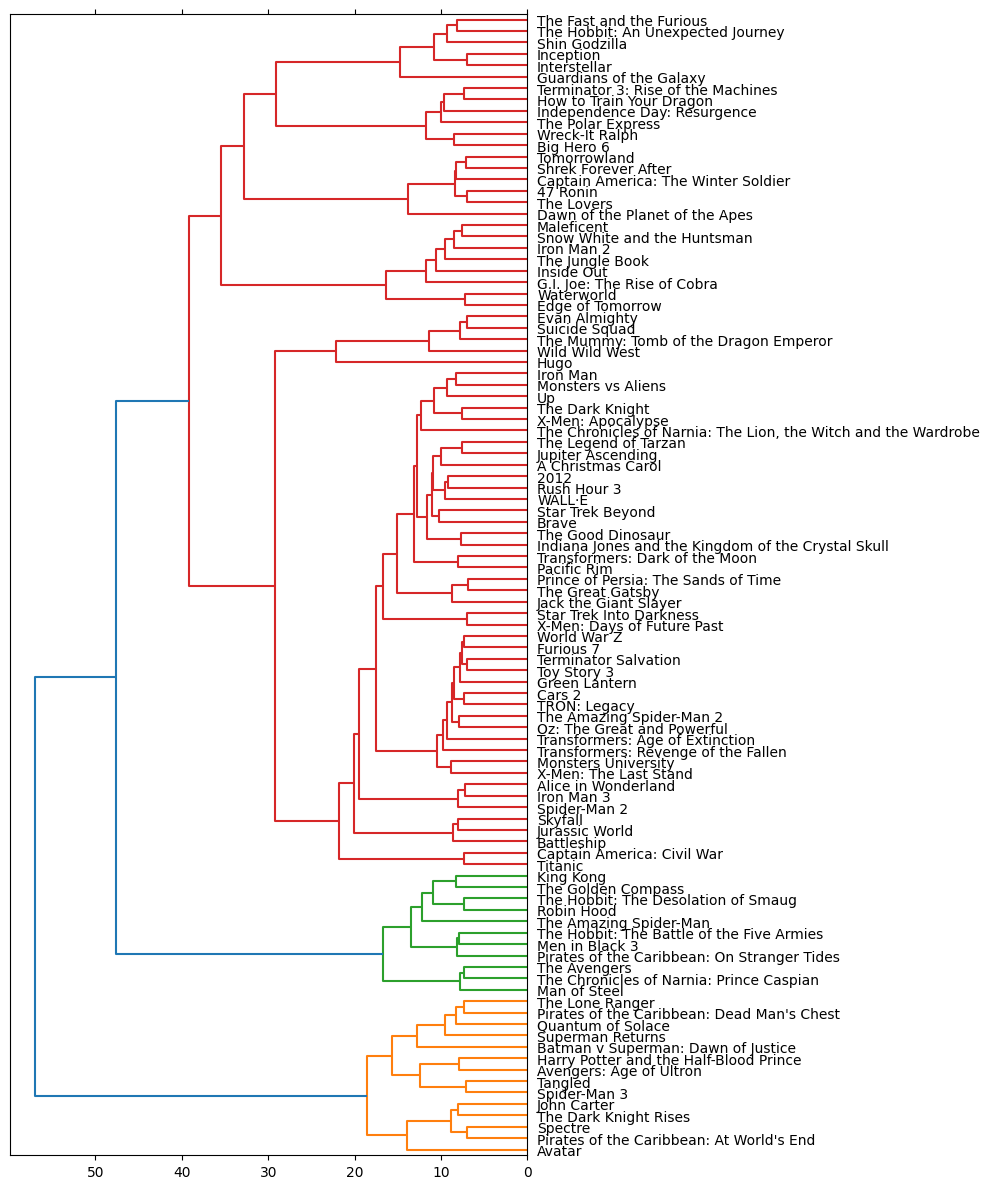

In [31]:
plot_hierarchical_clusters(linkage_matrix,
                           p=100,
                           movie_data=df,
                           figure_size=(10, 12))